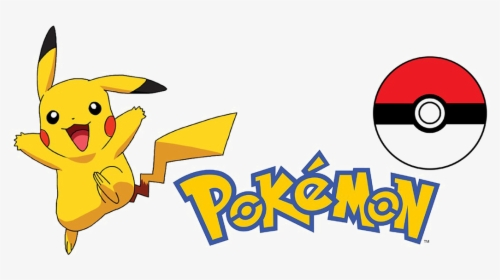


 # **Capstone 3: Pokemon Data Analysis**

## 1: Imports

Section 1: Importing of Python packages, mounting of my Google Drive, and assigning the dataset to a dataframe

### Packages

In [1]:
# Package imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Mount Google Drive

In [2]:
#Import and mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

#Import and store csv from Google Drive
df = pd.read_csv('/content/gdrive/My Drive/Datasets/Pokemon.csv')

Mounted at /content/gdrive


## 2: Preliminary Data Analysis

Section 2: Looking over the data and checking it for bias and usability

In [ ]:
#Replace Nan with '-' for pokemon without a secondary element type
df = df.fillna('-')

#Preview the dataset
df.sort_values(by=['#'])
df.head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,-,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,-,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,-,314,44,48,65,50,64,43,1,False


In [ ]:
#General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB



The data is normally distributed enoug for use in analysis



0      318
1      405
2      525
3      625
4      309
      ... 
795    600
796    700
797    600
798    680
799    600
Name: Total, Length: 800, dtype: int64

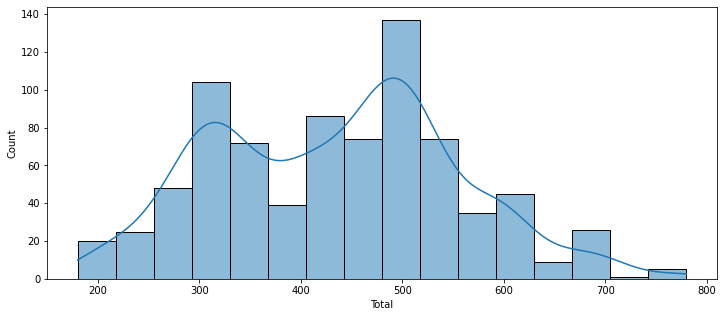

In [ ]:
# Preliminary testing distribution normality
plt.figure(figsize = (12,5))
sns.histplot(data=df, x="Total", kde=True)
print('''
The data is normally distributed enoug for use in analysis
''')

df['Total']

In [ ]:
## A/A T-Test for bias in data

# Create a new field in the dataframe called rand_bias with a random number 1 - 100
df = df.assign(rand_bias = np.random.randint(1, 100, 800))

#Double check that we have separated the rand_bias field more or less in half
print('''Count of Values

under 50 = True
over 50 = False
''')

under_50 = df.iloc[(df['rand_bias'] <= 50).values]
over_50 = df.iloc[(df['rand_bias'] > 50).values]

# T-Test
print('''
T-test Results: under_50 vs over_50
''')
print(stats.ttest_ind(under_50['Total'], over_50['Total']))
print('''
The results of the preliminary T-Test suggest that the data is free of bias when tested against itself.

Disclaimer: The method of random number assignment may influence results of T-Test when run multiple times in succession.
''')
#Saved the results of multiple T-Tests
#Ttest_indResult(statistic=-2.2597278519214767, pvalue=0.02410703926748652)
#Ttest_indResult(statistic=2.3269098216107795, pvalue=0.020219480364084264)
#Ttest_indResult(statistic=-2.0629779490164664, pvalue=0.03943772830984897)

#Quick Preview
#under_50.head()
#over_50.head()

Count of Values

under 50 = True
over 50 = False


T-test Results: under_50 vs over_50

Ttest_indResult(statistic=-0.9819646763617527, pvalue=0.3264148632546858)

The results of the preliminary T-Test suggest that the data is free of bias when tested against itself.

Disclaimer: The method of random number assignment may influence results of T-Test when run multiple times in succession.



## 3: Exploratory Analysis

Section 3: Explore and find what factors we will test for, as well as remove any factors and/or outliers that could cloud our data

### Top 10 strongest Pokemon! (Legendary and Non-Legendary)

In [ ]:
#Top 10 strongest of all Pokemon by df['Total'] descending
top_10_df = df.sort_values(by='Total', axis=0, ascending=0)
top_10_df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,rand_bias
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,71
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,83
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,94
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,70
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True,2
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True,89
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True,95
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True,6
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False,90
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False,14


In [ ]:
#Top 10 strongest of Non-Legendary Pokemon by df['Total'] descending
non_legend_df = df.iloc[(df['Legendary'] == False).values]
non_legend_df = non_legend_df.sort_values(by='Total', axis=0, ascending=0)
non_legend_df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,rand_bias
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False,83
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False,90
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False,14
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False,97
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False,92
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False,33
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False,75
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,69
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,67
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False,68


### How many Pokemon of each type?

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


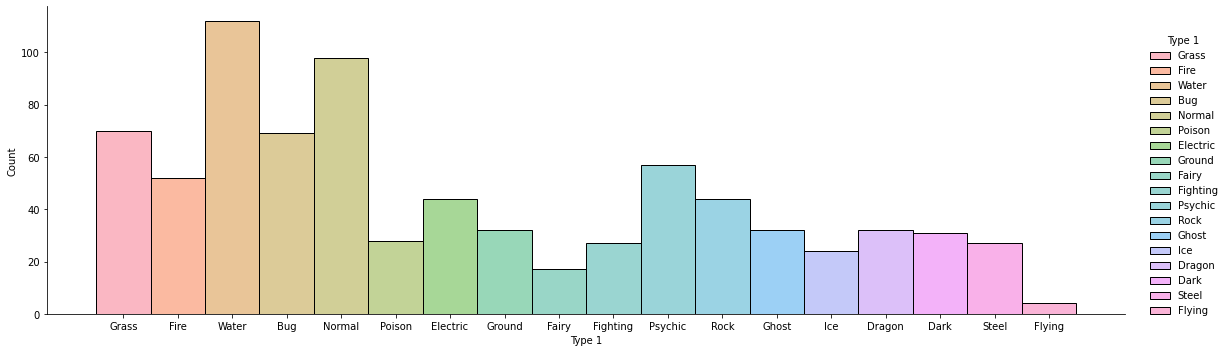

In [ ]:
#Overview of 'Type 1' element types
type_1_counts = df['Type 1'].value_counts()
print(type_1_counts)
sns.displot(data=type_1_counts, x=df['Type 1'], hue=df['Type 1'], aspect= 3.2)

### Overview of Dependant Variable ('Total')

count    800.00000
mean     435.10250
std      119.96304
min      180.00000
25%      330.00000
50%      450.00000
75%      515.00000
max      780.00000
Name: Total, dtype: float64


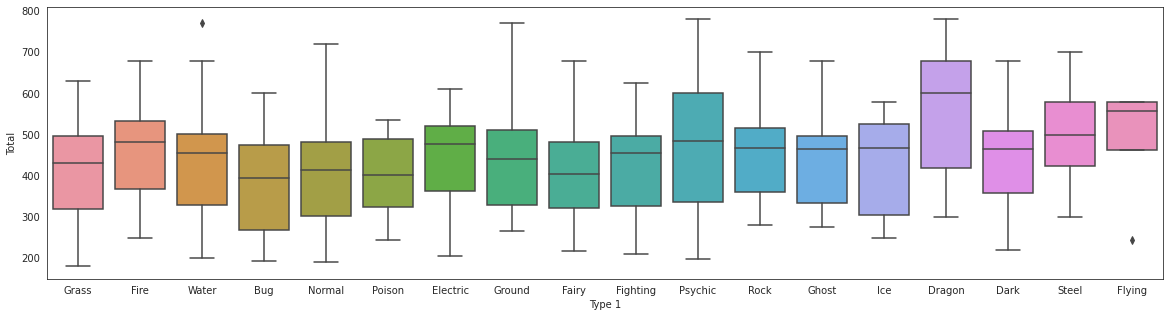

In [ ]:
#Overview of 'Total' field
print(df['Total'].describe())
plt.figure(figsize = (20,5))
sns.boxplot(y="Total", x="Type 1", data=df)

## 4: Correlation Tests

Section 4: Perform correlation tests to see what variables are influencing the data most

### Hypothesis: Choosing an element will not provide a significant increase or decrease in Total score, and therefore have no advantages in Pokemon battles.

### Legendary Pokemon and Total Score

 With a Pearson Correlation coeficcient of over 0.5,
we know that the Legendary status of a Pokemon has a large  and statistically significant influence on its 'Total' score

 Correlation Coefficient:



(0.5017583833882712, 3.0952457469647346e-52)

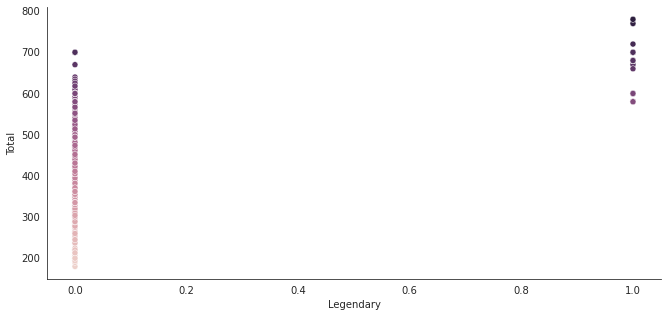

In [ ]:
#Test to see if the 'Legendary' status a Pokemon is a factor in it's 'Total' score
sns.set_style("white")
plt.figure(figsize = (11,5))
corr_1 = sns.scatterplot(x="Legendary", y="Total", hue='Total', legend=None, data=df)
sns.despine()

#Run Pearson Correlation Test
print(''' With a Pearson Correlation coeficcient of over 0.5,
we know that the Legendary status of a Pokemon has a large  and statistically significant influence on its 'Total' score
''')
print(''' Correlation Coefficient:
''')
df['Total'].corr(df['Legendary'])

stats.pearsonr(df['Total'], df['Legendary'])

In [ ]:
tions

### Pokemon Generations and Total Score

 With a Pearson Correlation coeficcient of close to 0,
we know that the Generation of a Pokemon has very little influence on its 'Total' score

 Correlation Coefficient:



(0.04838402403489613, 0.17157271591500375)

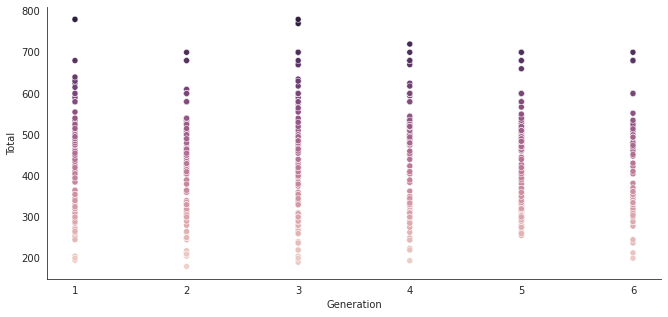

In [ ]:
#Test to see if the Generation that a Pokemon is a factor in it's 'Total' score
sns.set_style("white")
plt.figure(figsize = (11,5))
corr_1 = sns.scatterplot(x="Generation", y="Total", hue='Total', legend=None, data=df)
sns.despine()

#Run Pearson Correlation Test
print(''' With a Pearson Correlation coeficcient of close to 0,
we know that the Generation of a Pokemon has very little influence on its 'Total' score
''')
print(''' Correlation Coefficient:
''')
df['Total'].corr(df['Generation'])

stats.pearsonr(df['Total'], df['Generation'])

## 5: T-Tests (A/B)

Section 5: Test every element in the Type 1 cateory against the others to see if there are any differences in Total category

### Main Element Type

#### Water


In [ ]:
#Separate desired element type Pokemon from all others
water = df.iloc[(df['Type 1'] == 'Water').values]
#water.info()

not_water = df.iloc[(df['Type 1'] != 'Water').values]
#not_water.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(water['Total'], not_water['Total']))
print('''
Fail to Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(water['Total'],not_water['Total']))

print('''
***Being a water type Pokemon does not give you an inherent advantage agains other Pokemon types***
''')

T-Test Results:

Ttest_indResult(statistic=-0.4418547448849676, pvalue=0.6587140317488793)

Fail to Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between -17.428614529544888 and 28.235923499644485.

***Being a water type Pokemon does not give you an inherent advantage agains other Pokemon types***



#### Normal


In [ ]:
#Separate desired element type Pokemon from all others
normal = df.iloc[(df['Type 1'] == 'Normal').values]
#normal.info()

not_normal = df.iloc[(df['Type 1'] != 'Normal').values]
#not_normal.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(normal['Total'], not_normal['Total']))
print('''
Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


print(get_95_ci(normal['Total'],not_normal['Total']))

print('''
***Being a normal type Pokemon is a significant factor in Total score***
''')

T-Test Results:

Ttest_indResult(statistic=-2.9582139723494825, pvalue=0.0031856839156462584)

Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between 13.513881187846042 and 62.65438440899101.

***Being a normal type Pokemon is a significant factor in Total score***



#### Grass


In [ ]:
#Separate desired element type Pokemon from all others
grass = df.iloc[(df['Type 1'] == 'Grass').values]
#normal.info()

not_grass = df.iloc[(df['Type 1'] != 'Grass').values]
#not_normal.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(grass['Total'], not_grass['Total']))
print('''
Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


print(get_95_ci(grass['Total'],not_grass['Total']))

print('''
***Being a grass type Pokemon is a significant factor in Total score***
''')

T-Test Results:

Ttest_indResult(statistic=-1.019224791441654, pvalue=0.30840515487550546)

Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between -11.186777866300254 and 41.783255361407846.

***Being a grass type Pokemon is a significant factor in Total score***



#### Bug


In [ ]:
#Separate desired element type Pokemon from all others
bug = df.iloc[(df['Type 1'] == 'Bug').values]
#bug.info()

not_bug = df.iloc[(df['Type 1'] != 'Bug').values]
#not_bug.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(bug['Total'], not_bug['Total']))
print('''
Fail to Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


print(get_95_ci(bug['Total'],not_bug['Total']))

print('''
***Being a bug type Pokemon is NOT a significant factor in Total score***
''')

T-Test Results:

Ttest_indResult(statistic=-4.1094301747929896, pvalue=4.376342626539719e-05)

Fail to Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between 32.35960047598355 and 90.59517658145222.

***Being a bug type Pokemon is NOT a significant factor in Total score***



#### Psychic


In [ ]:
#Separate desired element type Pokemon from all others
psychic = df.iloc[(df['Type 1'] == 'Psychic').values]
#water.info()

not_psychic = df.iloc[(df['Type 1'] != 'Psychic').values]
#not_water.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(psychic['Total'], not_psychic['Total']))
print('''
Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(psychic['Total'],not_psychic['Total']))

print('''
***Being a psychic type Pokemon is a significant factor in Total score***
''')

T-Test Results:

Ttest_indResult(statistic=2.677616384847189, pvalue=0.007567184657975834)

Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between -81.05304370255863 and -6.903604310475316.

***Being a psychic type Pokemon is a significant factor in Total score***



#### Fire


In [ ]:
#Separate desired element type Pokemon from all others
fire = df.iloc[(df['Type 1'] == 'Fire').values]
#water.info()

not_fire = df.iloc[(df['Type 1'] != 'Fire').values]
#not_water.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(fire['Total'], not_fire['Total']))
print('''
Fail to Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(fire['Total'],not_fire['Total']))

print('''
***Being a fire type Pokemon is NOT a significant factor in Total score***
''')

T-Test Results:

Ttest_indResult(statistic=1.4291445119688737, pvalue=0.15335402785966284)

Fail to Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between -55.63041786209232 and 6.487266895411899.

***Being a fire type Pokemon is NOT a significant factor in Total score***



#### Rock


In [ ]:
#Separate desired element type Pokemon from all others
rock = df.iloc[(df['Type 1'] == 'Rock').values]
#water.info()

not_rock = df.iloc[(df['Type 1'] != 'Rock').values]
#not_water.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(rock['Total'], not_rock['Total']))
print('''
Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(rock['Total'],not_rock['Total']))

print('''
***Being a rock type Pokemon is a significant factor in Total score***
''')

T-Test Results:

Ttest_indResult(statistic=1.0607611738638798, pvalue=0.2891193877803104)

Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between -52.79928567298325 and 13.333677207374741.

***Being a rock type Pokemon is a significant factor in Total score***



#### Electric


In [ ]:
#Separate desired element type Pokemon from all others
electric = df.iloc[(df['Type 1'] == 'Electric').values]
#water.info()

not_electric = df.iloc[(df['Type 1'] != 'Electric').values]
#not_water.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(electric['Total'], not_electric['Total']))
print('''
Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(electric['Total'],not_electric['Total']))

print('''
***Being an electric type Pokemon is a significant factor in Total score***
''')

T-Test Results:

Ttest_indResult(statistic=0.47225278721211683, pvalue=0.636875479978457)

Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between -41.19372849146727 and 23.613641911380583.

***Being an electric type Pokemon is a significant factor in Total score***



#### Dragon


In [ ]:
#Separate desired element type Pokemon from all others
dragon = df.iloc[(df['Type 1'] == 'Dragon').values]
#water.info()

not_dragon = df.iloc[(df['Type 1'] != 'Dragon').values]
#not_water.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(dragon['Total'], not_dragon['Total']))
print('''
Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(dragon['Total'],not_dragon['Total']))

print('''
***Being an dragon type Pokemon is a significant factor in Total score***
''')

T-Test Results:

Ttest_indResult(statistic=5.662229624437618, pvalue=2.0848081691091745e-08)

Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between -171.58163591522583 and -68.89492658477417.

***Being an dragon type Pokemon is a significant factor in Total score***



#### Ghost

In [ ]:
#Separate desired element type Pokemon from all others
ghost = df.iloc[(df['Type 1'] == 'Ghost').values]
#water.info()

not_ghost = df.iloc[(df['Type 1'] != 'Ghosts').values]
#not_water.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(ghost['Total'], not_ghost['Total']))
print('''
Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(ghost['Total'],not_ghost['Total']))

print('''
***Being an ghost type Pokemon is a significant factor in Total score***
''')

T-Test Results:

Ttest_indResult(statistic=0.20683865268341026, pvalue=0.8361865989201057)

Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between -43.493722939846215 and 34.573722939846256.

***Being an ghost type Pokemon is a significant factor in Total score***



#### Ground


In [ ]:
ground = df.iloc[(df['Type 1'] == 'Ground').values]
#water.info()

not_ground = df.iloc[(df['Type 1'] != 'Ground').values]
#not_water.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(ground['Total'], not_ground['Total']))
print('''
Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(ground['Total'],not_ground['Total']))

print('''
***Being an ground type Pokemon is a significant factor in Total score***
''')

T-Test Results:

Ttest_indResult(statistic=0.11531404350415342, pvalue=0.9082252169972356)

Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between -46.26022711007898 and 41.26543544341235.

***Being an ground type Pokemon is a significant factor in Total score***



#### Dark


In [ ]:
#Separate desired element type Pokemon from all others
dark = df.iloc[(df['Type 1'] == 'Dark').values]
#water.info()

not_dark = df.iloc[(df['Type 1'] != 'Dark').values]
#not_water.info()

#T-Test results
print('''T-Test Results:
''')
print(stats.ttest_ind(dark['Total'], not_dark['Total']))
print('''
Reject the Null
''')


#Confidence Interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(dark['Total'],not_dark['Total']))

print('''
***Being an dark type Pokemon is a significant factor in Total score***
''')

T-Test Results:

Ttest_indResult(statistic=0.5034203898491395, pvalue=0.6148076678090588)

Reject the Null

The difference in means at the 95% confidence interval (two-tail) is between -50.41528068131371 and 28.27861387482009.

***Being an dark type Pokemon is a significant factor in Total score***



## Conclusion

The element types Water, Fire, and Bug are the only ones who are shown to not be associated with a statistically significant difference in the Total score category. Every other element exhibits a significant difference in Total. This is contrary to the hypothesis that choosing an element will not provide a significant increase or decrease in Total score, and therefore have no advantages in Pokemon battles.